<h1>Import Dallas Dallas Historical Data and Clean it Up</h1>

In [1]:
from datetime import datetime, date
import calendar
from time import mktime
import pandas, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pytz import utc, timezone

datafile_16 = "Resources/FY_2016_Dallas_Animal_Shelter_Data.csv"
datafile_17 = "Resources/FY_2017_Dallas_Animal_Shelter_Data.csv"
datafile_18 = "Resources/FY_2018_Dallas_Animal_Shelter_Data.csv"
datafile_19 = "Resources/FY_2019_Dallas_Animal_Shelter_Data.csv"
datafile_20 = "Resources/FY2020_Dallas_Animal_Shelter_Data.csv"
datafile_21 = "Resources/FY2021_Dallas_Animal_Shelter_Data.csv"

df_2016 = pd.read_csv(datafile_16)
df_2017 = pd.read_csv(datafile_17)
df_2018 = pd.read_csv(datafile_18)
df_2019 = pd.read_csv(datafile_19)
df_2020 = pd.read_csv(datafile_20)
df_2021 = pd.read_csv(datafile_21)

In [2]:
#MERGE ALL FISCAL YEAR DATA INTO ONE DATAFRAME
frames = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
dallas_shelter_df = pd.concat(frames)

In [3]:
dallas_shelter_df

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,NaN,A21-259221,1,P0954698,12206,...,NaN,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,NaN,WESTMORELD,NaN
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,NaN,NaN,1,P0954696,7823,...,NaN,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,NaN,UNDERAGE,NaN
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,0,P0951768,NaN,...,NaN,NaN,NaN,NaN,NaN,MAR.2021,FY2021,NaN,OTHER,NaN
11020,A1117299,DOG,PIT BULL,AD 003,AVAILABLE,NaN,NaN,1,P0900636,3901,...,NaN,APP WNL,SCAN NO CHIP,OVER THE COUNTER,JAS,APR.2021,FY2021,NaN,WESTMORELD,NaN


In [4]:
#GET RID OF DUPLICATES (SAME ANIMAL ID AND MONTH ADMITTED TO SHELTER)
dup_animals = dallas_shelter_df.loc[dallas_shelter_df.duplicated(subset = ['Animal Id', 'Month']), 'Animal Id'].unique()
dup_animal_id = pd.DataFrame(dup_animals)
dup_animal_id

,0
0,A0469113
1,A0489693
2,A0578637
3,A0660996
4,A0696700
...,...
6899,A1117310
6900,A1118114
6901,A1117945
6902,A1116461


In [5]:
dallas_shelter_clean = dallas_shelter_df[dallas_shelter_df['Animal Id'].isin(dup_animals)==False]
dallas_shelter_clean

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,NaN,A21-259249,1,P0954725,2000,...,NaN,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,NaN,WESTMORELD,NaN
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,NaN,A21-259221,1,P0954698,12206,...,NaN,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,NaN,WESTMORELD,NaN
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,NaN,NaN,1,P0954696,7823,...,NaN,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,NaN,UNDERAGE,NaN
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,0,P0951768,NaN,...,NaN,NaN,NaN,NaN,NaN,MAR.2021,FY2021,NaN,OTHER,NaN


In [6]:
#GET RID OF UNNECESSARY COLUMNS AND GET RID OF ERRORS
dallas_shelter_data_pre = dallas_shelter_clean.dropna(how='all', subset=['Animal Breed'])
dallas_shelter_data = dallas_shelter_data_pre.drop(columns=['Source Id', 'Activity Sequence', 'Receipt Number', 'Census Tract', 'Intake Time', 'Outcome Time','Tag Type', 'Activity Number', 'Service Request Number', 'Unnamed: 16','Unnamed: 27'])
dallas_shelter_data

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,Reason,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,DESTRUCTIVE AT HOME,...,EUTHANIZED,7/21/2016,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,NaN,...,TRANSFER,3/31/2016,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,NaN,...,EUTHANIZED,7/5/2016,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,NaN,...,LOST REPORT,7/19/2016,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
5,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,NaN,...,RETURNED TO OWNER,9/27/2016,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1,OWNER SURRENDER,FIELD,1,MEDICAL,...,RETURNED TO OWNER,4/16/2021,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7,STRAY,CONFINED,1,OTHRINTAKS,...,RETURNED TO OWNER,4/16/2021,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13,STRAY,OTC,1,OTHRINTAKS,...,FOSTER,4/16/2021,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,1,NaN,...,LOST EXP,4/16/2021,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


In [7]:
#CHECK FORMATTING OF COLUMNS (DTYPES)
dallas_shelter_data['Intake Date'] = pd.to_datetime(dallas_shelter_data['Intake Date'])
dallas_shelter_data['Outcome Date'] = pd.to_datetime(dallas_shelter_data['Outcome Date'])
dallas_shelter_data.info()

dallas_shelter_data.to_csv('Resources\DallasData.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172204 entries, 1 to 11020
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Animal Id               172204 non-null  object        
 1   Animal Type             172204 non-null  object        
 2   Animal Breed            172204 non-null  object        
 3   Kennel Number           172204 non-null  object        
 4   Kennel Status           172204 non-null  object        
 5   Council District        163774 non-null  object        
 6   Intake Type             172204 non-null  object        
 7   Intake Subtype          169098 non-null  object        
 8   Intake Total            144806 non-null  object        
 9   Reason                  97639 non-null   object        
 10  Staff Id                139216 non-null  object        
 11  Intake Date             172204 non-null  datetime64[ns]
 12  Due Out                 139216 

In [8]:
#ADD A COLUMN TO DF TO MEASURE LENGTH OF TIME IN SHELTER PER ANIMAL
time_in_shelter = dallas_shelter_data["Outcome Date"] - dallas_shelter_data["Intake Date"]
dallas_shelter_data.insert(1, "Time in Shelter", time_in_shelter, True)
dallas_shelter_data

,Animal Id,Time in Shelter,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
1,A0001656,0 days,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,...,EUTHANIZED,2016-07-21,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
2,A0014681,54 days,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,...,TRANSFER,2016-03-31,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN
3,A0117773,0 days,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,EUTHANIZED,2016-07-05,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
4,A0119934,12 days,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,...,LOST REPORT,2016-07-19,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
5,A0132276,2 days,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,RETURNED TO OWNER,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,1 days,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1,OWNER SURRENDER,FIELD,1,...,RETURNED TO OWNER,2021-04-16,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
11017,A0701527,1 days,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7,STRAY,CONFINED,1,...,RETURNED TO OWNER,2021-04-16,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
11018,A1118116,1 days,CAT,DOMESTIC SH,N04,UNAVAILABLE,13,STRAY,OTC,1,...,FOSTER,2021-04-16,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
11019,A1116166,35 days,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,LOST EXP,2021-04-16,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


In [9]:
#CHECK COLUMN DTYPES AGAIN FOR NEW COLUMN FORMAT
dallas_shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172204 entries, 1 to 11020
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Animal Id               172204 non-null  object         
 1   Time in Shelter         171215 non-null  timedelta64[ns]
 2   Animal Type             172204 non-null  object         
 3   Animal Breed            172204 non-null  object         
 4   Kennel Number           172204 non-null  object         
 5   Kennel Status           172204 non-null  object         
 6   Council District        163774 non-null  object         
 7   Intake Type             172204 non-null  object         
 8   Intake Subtype          169098 non-null  object         
 9   Intake Total            144806 non-null  object         
 10  Reason                  97639 non-null   object         
 11  Staff Id                139216 non-null  object         
 12  Intake Date      

<h1>Start getting some basic information about the data to make it easier to analyze</h1>

In [10]:
#GET SOME BASIC COUNTS TO GET A BETTER IDEA OF THE DATA
breeds = dallas_shelter_data["Animal Breed"].value_counts()
num_breeds = len(breeds)
animal_types = dallas_shelter_data["Animal Type"].value_counts()
num_animal_types = len(animal_types)
intake_types = dallas_shelter_data["Intake Type"].value_counts()
num_intake_types = len(intake_types)
origin_types = dallas_shelter_data["Animal Origin"].value_counts()
num_origin_types = len(origin_types)


print(f"Number of breeds: {num_breeds}")
print(f"Number of animal types: {num_animal_types}")
print(f"Number of intake types: {num_intake_types}")
print(f"Number of origin types: {num_origin_types}")

Number of breeds: 371
Number of animal types: 6
Number of intake types: 11
Number of origin types: 9


In [11]:
#GET MORE INFO ABOUT DATA
print(f"Data Frame: \n{dallas_shelter_data}\n")
print(f"Column Types: \n{dallas_shelter_data.dtypes}\n")

animal_types_fulllist = dallas_shelter_data['Animal Type'].tolist()

animal_types_array = dallas_shelter_data['Animal Type'].to_numpy()


Data Frame: 
      Animal Id Time in Shelter Animal Type     Animal Breed Kennel Number  \
1      A0001656          0 days         DOG    LABRADOR RETR        LAB 01   
2      A0014681         54 days         DOG         PIT BULL       PAWS 24   
3      A0117773          0 days         DOG         PIT BULL        LAB 01   
4      A0119934         12 days         CAT     RUSSIAN BLUE          LOST   
5      A0132276          2 days         CAT      DOMESTIC SH         QC 03   
...         ...             ...         ...              ...           ...   
11014  A1100474          1 days         DOG     CHIHUAHUA SH       LFSD 18   
11017  A0701527          1 days         DOG  SCHNAUZER STAND       LFSD 03   
11018  A1118116          1 days         CAT      DOMESTIC SH           N04   
11019  A1116166         35 days         DOG    GERM SHEPHERD          LOST   
11020  A1117299         13 days         DOG         PIT BULL        AD 003   

                  Kennel Status Council District  

In [12]:
#GET FULL LIST OF DIFFERNT POSSIBLE INPUTS IN COLUMNS
animal_types_list = dallas_shelter_data['Animal Type'].unique()
origin_types_list = dallas_shelter_data['Animal Origin'].unique()
intake_types_list = dallas_shelter_data['Intake Type'].unique()
intake_subtypes_list = dallas_shelter_data['Intake Subtype'].unique()
outcome_types_list = dallas_shelter_data['Outcome Type'].unique()
outcome_subtypes_list = dallas_shelter_data['Outcome Subtype'].unique()
intake_conditions_list = dallas_shelter_data['Intake Condition'].unique()
outcome_conditions_list = dallas_shelter_data['Outcome Condition'].unique()

print (f"Animal Types: {animal_types_list}")
print (f"Animal Origins: {origin_types_list}")
print (f"Intake Types: {intake_types_list}")
print (f"Intake Subtypes: {intake_subtypes_list}")
print (f"Intake Conditions: {intake_conditions_list}")
print (f"Outcome Types: {outcome_types_list}")
print (f"Outcome Subtypes: {outcome_subtypes_list}")
print (f"Outcome Conditions: {outcome_conditions_list}")

Animal Types: ['DOG' 'CAT' 'WILDLIFE' 'LIVESTOCK' 'BIRD' 'D']
Animal Origins: ['OVER THE COUNTER' 'FIELD' 'SWEEP' nan 'RAPID' 'OPS' 'AGGOPS' 'BITE'
 'CARE' 'AGGDD']
Intake Types: ['OWNER SURRENDER' 'LOST REPORT' 'CONFISCATED' 'STRAY' 'FOUND REPORT'
 'TRANSFER' 'FOSTER' 'WILDLIFE' 'TREATMENT' 'KEEPSAFE' 'DISPOS REQ']
Intake Subtypes: ['GENERAL' 'EUTHANASIA REQUESTED' nan 'QUARANTINE' 'AT LARGE'
 'POSSIBLY OWNED' '#NAME?' 'CONFINED' 'KEEP SAFE' 'RETURN30'
 'KEEP SAFE - DEAD ON ARRIVAL' 'OTHER' 'QUARANTINE - DEAD ON ARRIVAL'
 'DANGEROUS' 'CRUELT - DEAD ON ARRIVAL' 'CRUELTY' 'UNINJURED' 'INJURED'
 'TRAP PROGRAM' 'EVICTION' 'TRAP NEUTER RETURN' 'SPCA TEXAS'
 'DANGER - DEAD ON ARRIVAL' 'QUARANTINE DEAD ON ARRIVAL' 'DEAD ON ARRIVAL'
 'KEEP SAFE DEAD ON ARRIVAL' 'HEART WORM' 'CRUELT DEAD ON ARRIVAL'
 'RETURN' 'SURGERY' 'MISSING' 'WEB' 'FOLLOWUP' 'APPOINT' 'TREATMENT'
 'WITH ID' 'SX POST OP' 'SAC DEAD ON ARRIVAL' 'STRAY' 'DIED' 'FOR ADOPT'
 'NON-RABIES' 'SPAY/NEUT' 'OTC' 'FIELD' 'SAC' 'RABIES' 

In [13]:
#START GATHERING SUMMARY STATISTICS
groupby_animals = dallas_shelter_data.groupby(["Animal Type"])

totalAnimals = dallas_shelter_data["Animal Id"].nunique()
animalCount = groupby_animals["Animal Id"].nunique()
animalPercent = animalCount / totalAnimals * 100

shelter_animals = pd.DataFrame({"Total Animals": animalCount,
                                "Percent of Total": animalPercent})
shelter_animals["Percent of Total"] = shelter_animals["Percent of Total"].map("{:.2f}%".format)
shelter_animals[["Total Animals", "Percent of Total"]].sort_values(["Total Animals"], ascending=False)

,Total Animals,Percent of Total
Animal Type,,
DOG,107858,71.82%
CAT,34771,23.15%
WILDLIFE,5557,3.70%
BIRD,1848,1.23%
LIVESTOCK,139,0.09%
D,1,0.00%


In [14]:
#START GATHERING SUMMARY STATISTICS
groupby_intakes = dallas_shelter_data.groupby(["Intake Type"])

intakeCount = groupby_intakes["Animal Id"].nunique()
intakePercent = intakeCount / totalAnimals * 100

shelter_intakes = pd.DataFrame({"Total Intakes": intakeCount,
                                "Percent of Total": intakePercent})
shelter_intakes["Percent of Total"] = shelter_intakes["Percent of Total"].map("{:.2f}%".format)
shelter_intakes[["Total Intakes", "Percent of Total"]].sort_values(["Total Intakes"], ascending=False)

,Total Intakes,Percent of Total
Intake Type,,
STRAY,100941,67.22%
OWNER SURRENDER,38588,25.70%
CONFISCATED,7697,5.13%
WILDLIFE,5212,3.47%
FOSTER,4017,2.67%
LOST REPORT,2226,1.48%
TREATMENT,1346,0.90%
FOUND REPORT,851,0.57%
TRANSFER,740,0.49%


In [15]:
#START GATHERING SUMMARY STATISTICS
groupby_outcomes = dallas_shelter_data.groupby(["Outcome Type"])

outcomeCount = groupby_outcomes["Animal Id"].nunique()
outcomePercent = outcomeCount / totalAnimals * 100

shelter_outcomes = pd.DataFrame({"Total Outcomes": outcomeCount,
                                "Percent of Total": outcomePercent})
shelter_outcomes["Percent of Total"] = shelter_outcomes["Percent of Total"].map("{:.2f}%".format)
shelter_outcomes[["Total Outcomes", "Percent of Total"]].sort_values(["Total Outcomes"], ascending=False)

,Total Outcomes,Percent of Total
Outcome Type,,
ADOPTION,46725,31.11%
EUTHANIZED,34393,22.90%
TRANSFER,34024,22.66%
RETURNED TO OWNER,26780,17.83%
FOSTER,4038,2.69%
LOST EXP,3083,2.05%
WILDLIFE,2308,1.54%
LOST REPORT,2209,1.47%
DEAD ON ARRIVAL,1727,1.15%


In [16]:
#START GATHERING SUMMARY STATISTICS
groupby_year = dallas_shelter_data.groupby(["Year"])

yearCount = groupby_year["Animal Id"].nunique()
yearPercent = yearCount / totalAnimals * 100

shelter_years = pd.DataFrame({"Animals Per Year": yearCount,
                                "Percent of Total": yearPercent})
shelter_years["Percent of Total"] = shelter_years["Percent of Total"].map("{:.2f}%".format)
shelter_years[["Animals Per Year", "Percent of Total"]].sort_values(["Year"], ascending=False)

,Animals Per Year,Percent of Total
Year,,
FY2021,8461,5.63%
FY2020,22477,14.97%
FY2019,35545,23.67%
FY2018,31541,21.00%
FY2017,31298,20.84%
FY2016,28897,19.24%


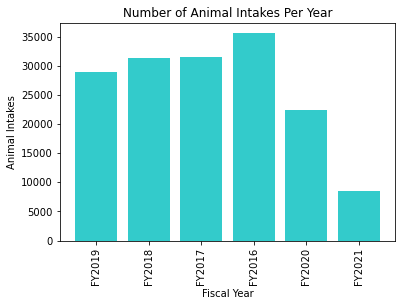

In [17]:
#PLOT IDEA - BAR CHART 
years = dallas_shelter_data["Year"].value_counts()
x_axis = years.index.values

plt.bar(x_axis, yearCount, color='c', alpha=0.8, align='center')
plt.xlabel("Fiscal Year")
plt.ylabel("Animal Intakes")
plt.title("Number of Animal Intakes Per Year")
plt.xticks(rotation="vertical")
plt.show()



<h1>Add a Column to the DataFrame to Analyze How Long Animals Stayed in the Shelter</h1>

In [18]:
#GET INFORMATION ON HOW LONG ANIMALS WERE IN SHELTER

bins = [pd.Timedelta("0 days"), pd.Timedelta("9 days"), pd.Timedelta("19 days"),pd.Timedelta("29 days"), pd.Timedelta("39 days"), pd.Timedelta("150 days")]
time_labels = ["<10", "10-19", "20-29", "30-39", "40+"]

dallas_shelter_data["Time in Shelter (Days)"] = pd.cut(dallas_shelter_data["Time in Shelter"], bins, labels=time_labels)
groupby_time = dallas_shelter_data.groupby(["Time in Shelter (Days)"])

animalCount = groupby_time["Animal Id"].nunique()
timePercent = animalCount / totalAnimals * 100

time_demographics = pd.DataFrame({"Animals": animalCount,
                                 "Percent of Animals": timePercent})

time_demographics["Percent of Animals"] = time_demographics["Percent of Animals"].map("{:.2f}%".format)

time_demographics


,Animals,Percent of Animals
Time in Shelter (Days),,
<10,82528,54.95%
10-19,24121,16.06%
20-29,6072,4.04%
30-39,5445,3.63%
40+,3051,2.03%


<h1> Separate DataFrames into Individual Animal Type DataFrames for More Specific Analysis</h1>

In [19]:
#COMBINE LONG HAIR AND SHORT HAIR CHIHUAHUAS WITH CHIHUAHUAS, COMBINE ROUGH & SMOOTH COLLIES
dallas_shelter_data['Animal Breed'] = dallas_shelter_data['Animal Breed'].replace(['STAFFORDSHIRE','CHIHUAHUA SH','CHIHUAHUA LH','COLLIE SMOOTH','COLLIE ROUGH','DOMESTIC SHORTH'],
                                                          ['AMERICAN STAFF','CHIHUAHUA','CHIHUAHUA','COLLIE', 'COLLIE','DOMESTIC SH'])

#CREATE SEPARATE DATAFRAMES FOR EACH ANIMAL TYPE FOR MORE DETAILED ANALYSIS
dogs_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "DOG",:]
cats_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "CAT",:]
birds_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "BIRD",:]
livestock_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "LIVESTOCK",:]
wildlife_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "WILDLIFE",:]

In [20]:
#GATHER INFORMATION ON HOW MANY OF EACH TYPE OF ANIMAL WERE ADMITTED TO SHELTERS
groupby_dogs_year = dogs_df.groupby(["Year"])
num_dogs_year = groupby_dogs_year["Animal Id"].nunique()

groupby_cats_year = cats_df.groupby(["Year"])
num_cats_year = groupby_cats_year["Animal Id"].nunique()

groupby_birds_year = birds_df.groupby(["Year"])
num_birds_year = groupby_birds_year["Animal Id"].nunique()

groupby_livestock_year = livestock_df.groupby(["Year"])
num_livestock_year = groupby_livestock_year["Animal Id"].nunique()

groupby_wildlife_year = wildlife_df.groupby(["Year"])
num_wildlife_year = groupby_wildlife_year["Animal Id"].nunique()


animals_per_year = pd.DataFrame({"Total Dogs Admitted": num_dogs_year,
                                "Total Cats Admitted": num_cats_year,
                                "Total Birds Admitted": num_birds_year,
                                "Total Livestock Admitted": num_livestock_year,
                                "Total Wildlife Admitted": num_wildlife_year,
                                "Total Animals Admitted": yearCount})

animals_per_year


,Total Dogs Admitted,Total Cats Admitted,Total Birds Admitted,Total Livestock Admitted,Total Wildlife Admitted,Total Animals Admitted
Year,,,,,,
FY2016,20205,6909,403,30,1350,28897
FY2017,23159,7082,304,16,737,31298
FY2018,22777,7387,372,22,982,31541
FY2019,25799,8234,372,26,1114,35545
FY2020,16440,4709,283,27,1018,22477
FY2021,6330,1627,118,18,368,8461


<h1>More Clean-Up</h1>

In [21]:
#LIST DOGS BREEDS TO SEARCH FOR ANY DUPLICATES OR SPELLING CHANGES BETWEEN YEARS
dogbreeds_type_list = dogs_df['Animal Breed'].unique()
dogbreeds_type_list

array(['LABRADOR RETR', 'PIT BULL', 'GERM SHEPHERD', 'PITBULL',
       'ROTTWEILER', 'GOLDEN RETR', 'BEAGLE', 'POMERANIAN', 'DACHSHUND',
       'CHINESE SHARPEI', 'CHIHUAHUA', 'POODLE MIN', 'BORDER COLLIE',
       'DACHSHUND LH', 'MIXED', 'SHEPHERD MIX', 'QUEENSLAND HEEL',
       'COCKER SPAN', 'ENG SPRNGR SPAN', 'ALASKAN HUSKY',
       'DOBERMAN PINSCH', 'CHOW CHOW', 'BOXER', 'BULL TERRIER',
       'CAIRN TERRIER', 'SIBERIAN HUSKY', 'AUST SHEPHERD', 'COLLIE',
       'PARSON RUSS TER', 'YORKSHIRE TERR', 'RAT TERRIER',
       'AM PIT BULL TER', 'PUG', 'AKITA', 'SCHNAUZER STAND',
       'AIREDALE TERR', 'BEAGLE MIX', 'HUSKY', 'GREAT PYRENEES',
       'AMERICAN STAFF', 'SCHNAUZER MIN', 'BLOODHOUND', 'SHIH TZU',
       'POODLE MIX', 'BORDER TERRIER', 'PAPILLON', 'CAVALIER SPAN',
       'BASSET HOUND', 'LHASA APSO', 'AMER ESKIMO', 'BASENJI',
       'FOX TERR WIRE', 'SC WHEAT TERR', 'WEIMARANER', 'SHEPHERD',
       'BICHON FRISE', 'AUST CATTLE DOG', 'WELSH CORGI CAR',
       'AMER BULLDOG', 

In [22]:
groupby_dogbreed = dogs_df.groupby(['Animal Breed'])
num_dogs_breed = groupby_dogbreed["Animal Id"].nunique()
dogs_per_breed = pd.DataFrame({"Number of Breed": num_dogs_breed})

dogs_per_breed

,Number of Breed
Animal Breed,
AFFENPINSCHER,45
AFGHAN HOUND,3
AIREDALE TERR,52
AKBASH,1
AKITA,227
...,...
WEST HIGHLAND,85
WH PT GRIFFON,10
WHIPPET,41


In [23]:
# MOST COMMON DOG TYPE FOUND IN SHELTER
dog_column = dogs_per_breed["Number of Breed"]
max_breed = dog_column.max()
index_max_breed = dog_column.idxmax()

print(max_breed)
print(index_max_breed)

23136
PIT BULL


<h1>What are the most common dog breeds in the Dallas Historical Data?</h1>
<h2>Plus analysis for each of these breeds</h2>

In [24]:
# TOP 10 MOST COMMON DOG BREEDS
dogs_per_breed.sort_values(by=['Number of Breed'], ascending=False).head(10)

,Number of Breed
Animal Breed,
PIT BULL,23136
CHIHUAHUA,16235
GERM SHEPHERD,13458
LABRADOR RETR,12971
CAIRN TERRIER,3223
AMERICAN STAFF,1954
ROTTWEILER,1900
ALASKAN HUSKY,1751
SHIH TZU,1745


In [25]:
# LIST OF ALL CAT BREEDS IN DALLAS DATA TO CHECK FOR DUPLICATES

catbreeds_type_list = cats_df['Animal Breed'].unique()
catbreeds_type_list

array(['RUSSIAN BLUE', 'DOMESTIC SH', 'DOMESTIC LH', 'DOMESTIC MH',
       'AMER SH', 'SIAMESE', 'SNOWSHOE', 'AMER CURL SH', 'SPHYNX',
       'MAINE COON', 'HIMALAYAN', 'MANX', 'PERSIAN', 'TONKINESE',
       'ANGORA', 'ABYSSINIAN', 'TURKISH ANGORA', 'EXOTIC SH',
       'BRITISH SH', 'NORWGN FOREST', 'BENGAL', 'EUROPEAN SH',
       'CORNISH REX', 'RAGDOLL', 'KORAT', 'EGYPTIAN MAU', 'ORIENTAL SH',
       'BALINESE', 'AMER WIREHAIR', 'BOMBAY', 'MUNCHKIN SH', 'SAVANNAH',
       'AMER CURL LH', 'CHARTREUX', 'JAPAN BOBTAIL', 'BIRMAN', 'BURMESE',
       'COLORPOINT', 'HAVANA BROWN', 'TURKISH VAN', 'OCICAT', 'DEVON REX',
       'PIXIEBOB SH', 'SCOTTISH FOLD'], dtype=object)

In [26]:
# GET YEARLY TRENDS FOR TOP TEN BREEDS PER FY
pitbulls_df = dogs_df.loc[dogs_df["Animal Breed"] == "PIT BULL",:]
groupby_pitbulls_year = pitbulls_df.groupby(["Year"])
num_pitbulls_year = groupby_pitbulls_year["Animal Id"].nunique()

chihuahuas_df = dogs_df.loc[dogs_df["Animal Breed"] == "CHIHUAHUA",:]
groupby_chihuahuas_year = chihuahuas_df.groupby(["Year"])
num_chihuahuas_year = groupby_chihuahuas_year["Animal Id"].nunique()

germshep_df = dogs_df.loc[dogs_df["Animal Breed"] == "GERM SHEPHERD",:]
groupby_germshep_year = germshep_df.groupby(["Year"])
num_germshep_year = groupby_germshep_year["Animal Id"].nunique()

lab_df = dogs_df.loc[dogs_df["Animal Breed"] == "LABRADOR RETR",:]
groupby_lab_year = lab_df.groupby(["Year"])
num_lab_year = groupby_lab_year["Animal Id"].nunique()

cairn_df = dogs_df.loc[dogs_df["Animal Breed"] == "CAIRN TERRIER",:]
groupby_cairn_year = cairn_df.groupby(["Year"])
num_cairn_year = groupby_cairn_year["Animal Id"].nunique()

rott_df = dogs_df.loc[dogs_df["Animal Breed"] == "ROTTWEILER",:]
groupby_rott_year = rott_df.groupby(["Year"])
num_rott_year = groupby_rott_year["Animal Id"].nunique()

husky_df = dogs_df.loc[dogs_df["Animal Breed"] == "ALASKAN HUSKY",:]
groupby_husky_year = husky_df.groupby(["Year"])
num_husky_year = groupby_husky_year["Animal Id"].nunique()

shihtzu_df = dogs_df.loc[dogs_df["Animal Breed"] == "SHIH TZU",:]
groupby_shihtzu_year = shihtzu_df.groupby(["Year"])
num_shihtzu_year = groupby_shihtzu_year["Animal Id"].nunique()

cattledog_df = dogs_df.loc[dogs_df["Animal Breed"] == "AUST CATTLE DOG",:]
groupby_cattledog_year = cattledog_df.groupby(["Year"])
num_cattledog_year = groupby_cattledog_year["Animal Id"].nunique()

amstaff_df = dogs_df.loc[dogs_df["Animal Breed"] == "AMERICAN STAFF",:]
groupby_amstaff_year = amstaff_df.groupby(["Year"])
num_amstaff_year = groupby_amstaff_year["Animal Id"].nunique()


percent_total_pitbulls = num_pitbulls_year / num_dogs_year * 100
percent_total_chihuahuas = num_chihuahuas_year / num_dogs_year * 100
percent_total_germshep = num_germshep_year / num_dogs_year * 100
percent_total_lab = num_lab_year / num_dogs_year * 100
percent_total_cairn = num_cairn_year / num_dogs_year * 100
percent_total_rott = num_rott_year / num_dogs_year * 100
percent_total_husky = num_husky_year / num_dogs_year * 100
percent_total_shihtzu = num_shihtzu_year / num_dogs_year * 100
percent_total_cattledog = num_cattledog_year / num_dogs_year * 100
percent_total_amstaff = num_amstaff_year / num_dogs_year * 100


dog_breeds_per_year = pd.DataFrame({"Total Dogs Admitted": num_dogs_year,
                                "Total Pitbulls": num_pitbulls_year,
                                "Percent Pitbulls": percent_total_pitbulls,
                                "Total Chihuahuas": num_chihuahuas_year,
                                "Percent Chihuahuas": percent_total_chihuahuas,
                                "Total German Shepherds": num_germshep_year,
                                "Percent German Shepherds": percent_total_germshep,
                                "Total Labrador Retrievers": num_lab_year,
                                "Percent Labrador Retrievers": percent_total_lab,
                                "Total Cairn Terriers": num_cairn_year,
                                "Percent Cairn Terriers": percent_total_cairn,
                                "Total Rottweilers": num_rott_year,
                                "Percent Rottweilers": percent_total_rott, 
                                "Total Alaskan Huskies": num_husky_year,
                                "Percent Huskies": percent_total_husky,
                                "Total Shih Tzus": num_shihtzu_year,
                                "Percent Shih Tzus": percent_total_shihtzu,
                                "Total Cattledogs": num_cattledog_year,
                                "Percent Cattledogs": percent_total_cattledog,
                                "Total American Staffordshire": num_amstaff_year,
                                "Percent American Staffordshire": percent_total_amstaff,
                                "Total Animals Admitted": yearCount})

dog_breeds_per_year["Percent Pitbulls"] = dog_breeds_per_year["Percent Pitbulls"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Chihuahuas"] = dog_breeds_per_year["Percent Chihuahuas"].map("{:.2f}%".format)
dog_breeds_per_year["Percent German Shepherds"] = dog_breeds_per_year["Percent German Shepherds"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Labrador Retrievers"] = dog_breeds_per_year["Percent Labrador Retrievers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Cairn Terriers"] = dog_breeds_per_year["Percent Cairn Terriers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Rottweilers"] = dog_breeds_per_year["Percent Rottweilers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Huskies"] = dog_breeds_per_year["Percent Huskies"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Shih Tzus"] = dog_breeds_per_year["Percent Shih Tzus"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Cattledogs"] = dog_breeds_per_year["Percent Cattledogs"].map("{:.2f}%".format)
dog_breeds_per_year["Percent American Staffordshire"] = dog_breeds_per_year["Percent American Staffordshire"].map("{:.2f}%".format)

dog_breeds_per_year

,Total Dogs Admitted,Total Pitbulls,Percent Pitbulls,Total Chihuahuas,Percent Chihuahuas,Total German Shepherds,Percent German Shepherds,Total Labrador Retrievers,Percent Labrador Retrievers,Total Cairn Terriers,...,Percent Rottweilers,Total Alaskan Huskies,Percent Huskies,Total Shih Tzus,Percent Shih Tzus,Total Cattledogs,Percent Cattledogs,Total American Staffordshire,Percent American Staffordshire,Total Animals Admitted
Year,,,,,,,,,,,,,,,,,,,,,
FY2016,20205,3429,16.97%,2748,13.60%,2524,12.49%,2890,14.30%,600,...,1.85%,223,1.10%,277,1.37%,338,1.67%,1119,5.54%,28897
FY2017,23159,5229,22.58%,3631,15.68%,2870,12.39%,2811,12.14%,682,...,1.81%,292,1.26%,346,1.49%,262,1.13%,318,1.37%,31298
FY2018,22777,5236,22.99%,3559,15.63%,2855,12.53%,2715,11.92%,795,...,1.87%,379,1.66%,372,1.63%,342,1.50%,236,1.04%,31541
FY2019,25799,5608,21.74%,4328,16.78%,3154,12.23%,2851,11.05%,824,...,1.47%,465,1.80%,478,1.85%,393,1.52%,205,0.79%,35545
FY2020,16440,3618,22.01%,2233,13.58%,2152,13.09%,1778,10.82%,402,...,1.89%,383,2.33%,303,1.84%,248,1.51%,165,1.00%,22477
FY2021,6330,1622,25.62%,577,9.12%,813,12.84%,779,12.31%,80,...,1.80%,176,2.78%,81,1.28%,121,1.91%,50,0.79%,8461


In [27]:
# FIND AVERAGE LENGTH OF TIME EACH DOG BREED SPENT IN SHELTER

pitbulls_time = pitbulls_df.groupby(["Year"])["Time in Shelter"]
chihuahuas_time = chihuahuas_df.groupby(["Year"])["Time in Shelter"]
germshep_time = germshep_df.groupby(["Year"])["Time in Shelter"]
lab_time = lab_df.groupby(["Year"])["Time in Shelter"]
cairn_time = cairn_df.groupby(["Year"])["Time in Shelter"]
rott_time = rott_df.groupby(["Year"])["Time in Shelter"]
husky_time = husky_df.groupby(["Year"])["Time in Shelter"]
shihtzu_time = shihtzu_df.groupby(["Year"])["Time in Shelter"]
cattledog_time = cattledog_df.groupby(["Year"])["Time in Shelter"]
amstaff_time = amstaff_df.groupby(["Year"])["Time in Shelter"]
all_dogs_time = dogs_df.groupby(["Year"])["Time in Shelter"]

avg_pitbulls_year = pitbulls_time.apply(lambda x: np.mean(x))
avg_chihuahuas_year = chihuahuas_time.apply(lambda x: np.mean(x))
avg_germshep_year = germshep_time.apply(lambda x: np.mean(x))
avg_lab_year = lab_time.apply(lambda x: np.mean(x))
avg_cairn_year = cairn_time.apply(lambda x: np.mean(x))
avg_rott_year = rott_time.apply(lambda x: np.mean(x))
avg_husky_year = husky_time.apply(lambda x: np.mean(x))
avg_shihtzu_year = shihtzu_time.apply(lambda x: np.mean(x))
avg_cattledog_year = cattledog_time.apply(lambda x: np.mean(x))
avg_amstaff_year = amstaff_time.apply(lambda x: np.mean(x))
avg_dogs_time = all_dogs_time.apply(lambda x: np.mean(x))


In [28]:
time_in_shelter_per_year = pd.DataFrame({"Average for All Dogs": avg_dogs_time,
                                    "Avg for Pitbulls": avg_pitbulls_year,
                                    "Avg for Chihuahuas": avg_chihuahuas_year,
                                    "Avg for German Shepherds": avg_germshep_year,
                                    "Avg for Labrador Retrievers": avg_lab_year,
                                    "Avg for Cairn Terriers": avg_cairn_year,
                                    "Avg for Rottweilers": avg_rott_year,
                                    "Avg for Alaskan Huskies": avg_husky_year,
                                    "Avg for Shih Tzus": avg_shihtzu_year,
                                    "Avg for Cattledogs": avg_cattledog_year,
                                    "Avg for American Staffordshire": avg_amstaff_year})

time_in_shelter_per_year

,Average for All Dogs,Avg for Pitbulls,Avg for Chihuahuas,Avg for German Shepherds,Avg for Labrador Retrievers,Avg for Cairn Terriers,Avg for Rottweilers,Avg for Alaskan Huskies,Avg for Shih Tzus,Avg for Cattledogs,Avg for American Staffordshire
Year,,,,,,,,,,,
FY2016,10 days 04:01:23.095260,9 days 19:58:34.648602,9 days 04:04:30.563674,9 days 09:47:35.927051,10 days 18:29:52.885375,7 days 17:53:39.840000,7 days 22:20:03.084832,9 days 22:05:15.537848,10 days 12:30:25.352112,18 days 12:34:40.453257,11 days 11:42:55.633687
FY2017,6 days 17:28:00.806921,7 days 17:06:38.994072,5 days 03:40:49.840255,7 days 04:02:17.776311,7 days 09:20:14.414414,5 days 01:09:32.727272,7 days 05:50:10.909090,6 days 12:37:39.692307,5 days 01:53:15.505617,7 days 03:31:28.111888,8 days 06:33:27.887323
FY2018,6 days 10:21:33.756827,8 days 20:58:59.748953,4 days 07:30:07.122131,6 days 12:05:05.988409,7 days 00:37:26.400000,3 days 10:44:45.035629,7 days 07:05:01.321585,5 days 10:40:00,2 days 19:44:24,5 days 18:55:00.804289,9 days 11:10:32.061068
FY2019,7 days 08:45:44.043746,9 days 00:22:58.292148,4 days 10:55:57.166947,6 days 22:22:39.214586,8 days 06:33:43.963133,3 days 13:12:14.611048,7 days 10:51:45.213270,5 days 11:09:13.345388,5 days 16:09:10.669216,8 days 02:43:38.181818,9 days 20:15:00
FY2020,7 days 05:47:17.756087,7 days 19:09:34.624829,5 days 18:33:10.194420,6 days 14:57:59.040000,6 days 13:22:35.982274,2 days 18:39:37.981651,6 days 10:35:24.928366,6 days 16:53:27.582938,8 days 11:50:53.164556,4 days 22:20:00,8 days 12:07:25.360824
FY2021,8 days 06:19:40.665562,8 days 07:22:11.506849,7 days 14:30:41.860465,6 days 16:01:38.293515,6 days 07:14:58.903775,5 days 18:22:13.333333,6 days 13:54:57.478991,7 days 07:23:43.255813,8 days 16:35:17.647058,6 days 17:08:34.285714,10 days 10:57:23.478260


<h1>Create some visuals for Time Analysis</h1>

<h1>Collect the same information for Cat Breeds</h1>

In [29]:
#DO THE SAME WITH CATS TO GET TOP 10 CAT BREEDS IN DALLAS DATA
groupby_catbreed = cats_df.groupby(['Animal Breed'])
num_cats_breed = groupby_catbreed["Animal Id"].nunique()
cats_per_breed = pd.DataFrame({"Number of Breed": num_cats_breed})
cats_per_breed.sort_values(by=['Number of Breed'], ascending=False).head(10)

,Number of Breed
Animal Breed,
DOMESTIC SH,29987
DOMESTIC MH,2479
DOMESTIC LH,724
SIAMESE,558
AMER SH,482
RUSSIAN BLUE,173
MAINE COON,89
PERSIAN,37
MANX,28


<h1>Import the National Petfinder API data and Dallas Petfinder API data</h1>
<h2>Compare it to the Dallas Historical Data to see if Trends are Similar</h2>

In [30]:
API_dallas_petfinder_data = "Resources/DallasAnimalsTest.csv"
API_all_petfinder_data = "Resources/Animals.csv"
dallas_petfinder_df_pre = pd.read_csv(API_dallas_petfinder_data)
petfinder_df_pre = pd.read_csv(API_all_petfinder_data)

In [31]:
petfinder_df_pre.head(15)

,Unnamed: 0,id,organization_id,url,type,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.1,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full
0,0,51329854,CO502,https://www.petfinder.com/cat/bird-51329854/co...,Cat,Cat,Young,Male,Medium,NaN,...,CO,80304,US,51329854,cat,co502,NaN,NaN,NaN,NaN
1,1,51329850,IA172,https://www.petfinder.com/dog/negan-51329850/i...,Dog,Dog,Adult,Male,Large,NaN,...,IA,50265,US,51329850,dog,ia172,NaN,NaN,NaN,NaN
2,2,51329851,IA172,https://www.petfinder.com/dog/kong-51329851/ia...,Dog,Dog,Senior,Male,Medium,NaN,...,IA,50265,US,51329851,dog,ia172,NaN,NaN,NaN,NaN
3,3,51329852,IA172,https://www.petfinder.com/dog/ziko-51329852/ia...,Dog,Dog,Adult,Male,Large,NaN,...,IA,50265,US,51329852,dog,ia172,NaN,NaN,NaN,NaN
4,4,51329853,IA172,https://www.petfinder.com/dog/coco-51329853/ia...,Dog,Dog,Senior,Female,Small,NaN,...,IA,50265,US,51329853,dog,ia172,NaN,NaN,NaN,NaN
5,5,51329848,TX1633,https://www.petfinder.com/dog/augustus-5132984...,Dog,Dog,Baby,Male,Small,NaN,...,TX,78227,US,51329848,dog,tx1633,NaN,NaN,NaN,NaN
6,6,51329849,TX1633,https://www.petfinder.com/dog/aurelia-51329849...,Dog,Dog,Baby,Female,Small,NaN,...,TX,78227,US,51329849,dog,tx1633,NaN,NaN,NaN,NaN
7,7,51329846,ME30,https://www.petfinder.com/dog/baxter-51329846/...,Dog,Dog,Adult,Male,Medium,NaN,...,ME,04011,US,51329846,dog,me30,NaN,NaN,NaN,NaN
8,8,51329818,MN36,https://www.petfinder.com/dog/rose-51329818/mn...,Dog,Dog,Adult,Female,Medium,Short,...,MN,55419,US,51329818,dog,mn36,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
9,9,51329843,CA190,https://www.petfinder.com/cat/rosa-51329843/ca...,Cat,Cat,Adult,Female,Medium,NaN,...,CA,92027,US,51329843,cat,ca190,NaN,NaN,NaN,NaN


In [32]:
# GET RID OF UNNCESSARY INFO FROM PETFINDER DATA

dallas_petfinder_df = dallas_petfinder_df_pre.drop(columns=['distance','animal_type', 'contact.address.postcode','animal_id', 'organization_id','attributes.declawed','colors.primary','attributes.house_trained','colors.secondary','colors.tertiary','attributes.spayed_neutered','contact.phone','attributes.shots_current','contact.address.address2', 'attributes.special_needs','contact.address.address1', 'environment.children','contact.email', 'contact.email', 'videos','environment.dogs','url', 'coat', 'contact.address.country', 'organization_id.1', 'primary_photo_cropped.small', 'primary_photo_cropped.medium','primary_photo_cropped.large', 'primary_photo_cropped.full', 'Unnamed: 0', 'tags', 'name', 'description', 'environment.cats','organization_animal_id','photos','primary_photo_cropped'])
dallas_petfinder_df['status_changed_at'] = pd.to_datetime(dallas_petfinder_df['status_changed_at'])

petfinder_df = petfinder_df_pre.drop(columns=['distance','animal_type', 'contact.address.postcode','animal_id', 'organization_id','attributes.declawed','colors.primary','attributes.house_trained','colors.secondary','colors.tertiary','attributes.spayed_neutered','contact.phone','attributes.shots_current','contact.address.address2', 'attributes.special_needs','contact.address.address1', 'environment.children','contact.email', 'contact.email', 'videos','environment.dogs','url', 'coat', 'contact.address.country', 'organization_id.1', 'primary_photo_cropped.small', 'primary_photo_cropped.medium','primary_photo_cropped.large', 'primary_photo_cropped.full', 'Unnamed: 0', 'tags', 'name', 'description', 'environment.cats','organization_animal_id','photos','primary_photo_cropped'])
petfinder_df['status_changed_at'] = pd.to_datetime(petfinder_df['status_changed_at'])

dallas_petfinder_df.head(10)

,id,type,species,age,gender,size,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
0,51356664,Dog,Dog,Baby,Male,Medium,adoptable,2021-04-27 16:06:40+00:00,2021-04-27T16:06:40+0000,Border Collie,Mixed Breed,True,False,Fort Worth,TX
1,51356663,Dog,Dog,Baby,Female,Small,adoptable,2021-04-27 16:06:39+00:00,2021-04-27T16:06:39+0000,Shepherd,Mixed Breed,True,False,Fort Worth,TX
2,51356619,Dog,Dog,Adult,Male,Medium,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Cardigan Welsh Corgi,Mixed Breed,True,False,Irving,TX
3,51356620,Cat,Cat,Adult,Male,Large,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Domestic Medium Hair,Domestic Short Hair,True,False,Irving,TX
4,51356621,Cat,Cat,Young,Female,Small,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Domestic Short Hair,NaN,False,False,Irving,TX
5,51356593,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
6,51356594,Cat,Cat,Adult,Male,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Medium Hair,Domestic Short Hair,True,False,Carrollton,TX
7,51356595,Dog,Dog,Adult,Male,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Pit Bull Terrier,Mixed Breed,True,False,Carrollton,TX
8,51356596,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
9,51356597,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX


In [33]:
#ADD TIMESTAMP FOR WHEN DATA WAS EXTRACTED FROM PETFINDER
extract_date_dallas = pd.Timestamp("2021-04-27 16:30:00").tz_localize("UTC")
extract_date_all = pd.Timestamp("2021-04-24 16:30:00").tz_localize("UTC")
extract_date_dallas

Timestamp('2021-04-27 16:30:00+0000', tz='UTC')

In [34]:
#ADD TIME ON PETFINDER AS COLUMN

time_on_pf_dallas = extract_date_dallas - dallas_petfinder_df["status_changed_at"] # convert status changed to ts
dallas_petfinder_df.insert(1, "Time on Petfinder", time_on_pf_dallas, True)

time_on_pf = extract_date_all - petfinder_df["status_changed_at"] # convert status changed to ts
petfinder_df.insert(1, "Time on Petfinder", time_on_pf, True)

dallas_petfinder_df

,id,Time on Petfinder,type,species,age,gender,size,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
0,51356664,0 days 00:23:20,Dog,Dog,Baby,Male,Medium,adoptable,2021-04-27 16:06:40+00:00,2021-04-27T16:06:40+0000,Border Collie,Mixed Breed,True,False,Fort Worth,TX
1,51356663,0 days 00:23:21,Dog,Dog,Baby,Female,Small,adoptable,2021-04-27 16:06:39+00:00,2021-04-27T16:06:39+0000,Shepherd,Mixed Breed,True,False,Fort Worth,TX
2,51356619,0 days 00:23:30,Dog,Dog,Adult,Male,Medium,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Cardigan Welsh Corgi,Mixed Breed,True,False,Irving,TX
3,51356620,0 days 00:23:30,Cat,Cat,Adult,Male,Large,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Domestic Medium Hair,Domestic Short Hair,True,False,Irving,TX
4,51356621,0 days 00:23:30,Cat,Cat,Young,Female,Small,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Domestic Short Hair,NaN,False,False,Irving,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,27978852,2705 days 00:48:39,Dog,Dog,Young,Male,Large,adoptable,2013-11-30 15:41:21+00:00,2013-11-30T15:41:21+0000,German Shepherd Dog,Rottweiler,True,False,Haslet,TX
5096,27213880,1743 days 23:07:52,Dog,Dog,Adult,Female,Medium,adoptable,2016-07-18 17:22:08+00:00,2013-09-09T17:42:34+0000,Pit Bull Terrier,Boxer,True,False,Justin,TX
5097,27202433,2788 days 01:50:38,Dog,Dog,Young,Male,Large,adoptable,2013-09-08 14:39:22+00:00,2013-09-08T14:39:22+0000,Labrador Retriever,NaN,True,False,Mabank,TX
5098,27201060,2788 days 05:18:32,Dog,Dog,Young,Male,Large,adoptable,2013-09-08 11:11:28+00:00,2013-09-08T11:11:28+0000,Labrador Retriever,NaN,True,False,Mabank,TX


In [35]:
mean_time_dallas = dallas_petfinder_df["Time on Petfinder"].mean()
mean_time_all = petfinder_df["Time on Petfinder"].mean()
mean_time_dallas

Timedelta('190 days 09:39:39.613333')

In [36]:
#TYPES OF ANIMALS IN API DATA
pf_animal_type_list = petfinder_df['type'].unique()
pf_animal_type_list

array(['Cat', 'Dog', 'Small & Furry', 'Rabbit', 'Bird',
       'Scales, Fins & Other', 'Barnyard', 'Horse'], dtype=object)

In [37]:
# HOW MANY OF EACH TYPE? COMPARE NATIONAL TO DALLAS
groupby_type = petfinder_df.groupby(["type"])

totalPFAnimals = petfinder_df["id"].nunique()
typeCount = groupby_type["id"].nunique()
typePercent = typeCount / totalPFAnimals * 100

dallas_groupby_type = dallas_petfinder_df.groupby(["type"])

totalDallasPFAnimals = dallas_petfinder_df["id"].nunique()
DallastypeCount = dallas_groupby_type["id"].nunique()
DallastypePercent = DallastypeCount / totalDallasPFAnimals * 100

petfinder_animals = pd.DataFrame({"Total Animals (National)": typeCount,
                                "Percent of Total (National)": typePercent,
                                 "Total Animals (Dallas)": DallastypeCount,
                                 "Percent of Total (Dallas)": DallastypePercent})

petfinder_animals["Percent of Total (National)"] = petfinder_animals["Percent of Total (National)"].map("{:.2f}%".format)
petfinder_animals["Percent of Total (Dallas)"] = petfinder_animals["Percent of Total (Dallas)"].map("{:.2f}%".format)
petfinder_animals[["Total Animals (National)", "Percent of Total (National)","Total Animals (Dallas)","Percent of Total (Dallas)"]].sort_values(["Total Animals (Dallas)"], ascending=False)

,Total Animals (National),Percent of Total (National),Total Animals (Dallas),Percent of Total (Dallas)
Dog,5777,58.21%,3478.0,68.52%
Cat,3826,38.55%,1494.0,29.43%
Small & Furry,140,1.41%,60.0,1.18%
Rabbit,118,1.19%,42.0,0.83%
Barnyard,8,0.08%,2.0,0.04%
Bird,47,0.47%,NaN,nan%
Horse,2,0.02%,NaN,nan%
"Scales, Fins & Other",7,0.07%,NaN,nan%


<h3>There are no birds, horse, or fish listed on Petfinder in the Dallas area</h3>

In [38]:
# CALL BACK DALLAS HISTORICAL TYPE BREAKDOWN RESULTS
shelter_animals[["Total Animals", "Percent of Total"]].sort_values(["Total Animals"], ascending=False)

# WILDLIFE WOULD NOT BE UP FOR ADOPTION AND THEREFORE WOULD NOT BE IN PETFINDER DATA

,Total Animals,Percent of Total
Animal Type,,
DOG,107858,71.82%
CAT,34771,23.15%
WILDLIFE,5557,3.70%
BIRD,1848,1.23%
LIVESTOCK,139,0.09%
D,1,0.00%


<h1>Most Popular Dog Breeds in API Data (Dallas and National)</h1>

In [39]:
# TOP 10 DOG BREEDS IN PETFINDER (DALLAS) vs. NATIONAL

pf_dallas_dogs_df = dallas_petfinder_df.loc[dallas_petfinder_df["type"] == "Dog",:]
groupby_pfdallasdogbreed = pf_dallas_dogs_df.groupby(['breeds.primary'])
num_pfdallasdogs_breed = groupby_pfdallasdogbreed["id"].nunique()

pf_dogs_df = petfinder_df.loc[petfinder_df["type"] == "Dog",:]
groupby_pfdogbreed = pf_dogs_df.groupby(['breeds.primary'])
num_pfdogs_breed = groupby_pfdogbreed["id"].nunique()

pf_dogs_per_breed = pd.DataFrame({"Number of Breed - Dallas": num_pfdallasdogs_breed,
                                 "Number of Breed - National": num_pfdogs_breed})
pf_dogs_per_breed.sort_values(by=['Number of Breed - Dallas'], ascending=False).head(10)

,Number of Breed - Dallas,Number of Breed - National
Pit Bull Terrier,520.0,849.0
Labrador Retriever,484.0,594.0
Chihuahua,217.0,351.0
German Shepherd Dog,175.0,283.0
Shepherd,168.0,311.0
Boxer,135.0,153.0
American Staffordshire Terrier,117.0,115.0
Terrier,115.0,240.0
Australian Cattle Dog / Blue Heeler,98.0,128.0
Australian Shepherd,74.0,94.0


In [40]:
PFdogbreeds_type_list = pf_dallas_dogs_df['breeds.primary'].unique()
PFdogbreeds_type_list

array(['Border Collie', 'Shepherd', 'Cardigan Welsh Corgi',
       'Pit Bull Terrier', 'Irish Wolfhound', 'Dutch Shepherd', 'Terrier',
       'Chow Chow', 'Labrador Retriever', 'Cockapoo',
       'German Shepherd Dog', 'Great Pyrenees', 'Chihuahua',
       'Mixed Breed', 'Maltese', 'American Staffordshire Terrier', 'Pug',
       'Weimaraner', 'Beagle', 'Affenpinscher', 'Schnauzer',
       'Golden Retriever', 'Australian Cattle Dog / Blue Heeler', 'Boxer',
       'Basset Hound', 'Yorkshire Terrier', 'Australian Shepherd',
       'Poodle', 'Hound', 'Cattle Dog', 'Retriever', 'Husky',
       'Doberman Pinscher', 'Bull Terrier', 'Plott Hound',
       'Cairn Terrier', 'American Bulldog', 'Pointer',
       'Catahoula Leopard Dog', 'Great Dane', 'Shih Tzu',
       'Anatolian Shepherd', 'Wirehaired Terrier', 'Akita', 'Dachshund',
       'Collie', 'Pomeranian', 'Rottweiler', 'Black Mouth Cur', 'Corgi',
       'Brittany Spaniel', 'Redbone Coonhound', 'Mastiff',
       'German Shorthaired Pointer

In [41]:
# MODIFY DALLAS SHELTER DATA (MOST POP ONLY) TO MATCH BREED NAMES IN PETFINDER
dogs_df['Animal Breed'] = dogs_df['Animal Breed'].replace(['PIT BULL','CHIHUAHUA','GERM SHEPHERD','LABRADOR RETR','CAIRN TERRIER','ROTTWEILER','ALASKAN HUSKY','SHIH TZU','AUST CATTLE DOG','SHEPHERD','AMERICAN STAFF','TERRIER','AUST SHEPHERD'],
                                                ['Pit Bull Terrier','Chihuahua','German Shepherd Dog', 'Labrador Retriever','Cairn Terrier', 'Rottweiler','Siberian Husky','Shih Tzu','Australian Cattle Dog / Blue Heeler','Shepherd','American Staffordshire Terrier','Terrier','Australian Shepherd'])

groupby_moddogbreed = dogs_df.groupby(['Animal Breed'])
num_moddogs_breed = groupby_moddogbreed["Animal Id"].nunique()
mod_dogs_per_breed = pd.DataFrame({"Number of Breed": num_moddogs_breed})
mod_dogs_per_breed.sort_values(by=['Number of Breed'], ascending=False).head(10)     


C:\Users\Annika\anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number of Breed
Animal Breed,
Pit Bull Terrier,23136
Chihuahua,16235
German Shepherd Dog,13458
Labrador Retriever,12971
Cairn Terrier,3223
American Staffordshire Terrier,1954
Rottweiler,1900
Siberian Husky,1751
Shih Tzu,1745


<h1>Compare the Percentages of the Top 10 Dog Breeds in the Dallas DataSets with the Percentages of the Same Breeds that are Currently Listed in Dallas and Nationally</h1>
<h2>Are the same breeds ending up in shelters?</h2>

In [42]:
#versus

totalDogsShelter = dogs_df["Animal Id"].nunique()
totalDogsDallasPF = pf_dallas_dogs_df["id"].nunique()
totalDogsPF = pf_dogs_df["id"].nunique()

percent_moddogs = num_moddogs_breed / totalDogsShelter * 100
percent_pfdallasdogs = num_pfdallasdogs_breed / totalDogsDallasPF * 100
percent_pfdogs = num_pfdogs_breed / totalDogsPF * 100

dogs_per_breed_combined = pd.DataFrame({"Number Dogs - Dallas Shelter Historical": num_moddogs_breed,
                                       "Percent of Total Dogs in Dallas Shelter Data": percent_moddogs,
                                        "Number Dogs - Dallas Petfinder": num_pfdallasdogs_breed,
                                        "Percent of Total Dogs in Dallas Petfinder": percent_pfdallasdogs,
                                       "Number Dogs - National Petfinder": num_pfdogs_breed,
                                        "Percent of Total Dogs in National Petfinder": percent_pfdogs})

dogs_per_breed_combined["Percent of Total Dogs in Dallas Petfinder"] = dogs_per_breed_combined["Percent of Total Dogs in Dallas Petfinder"].map("{:.2f}%".format)
dogs_per_breed_combined["Percent of Total Dogs in Dallas Shelter Data"] = dogs_per_breed_combined["Percent of Total Dogs in Dallas Shelter Data"].map("{:.2f}%".format)
dogs_per_breed_combined["Percent of Total Dogs in National Petfinder"] = dogs_per_breed_combined["Percent of Total Dogs in National Petfinder"].map("{:.2f}%".format)

dogs_per_breed_combined.sort_values(by=['Number Dogs - Dallas Shelter Historical'], ascending=False).head(10)

,Number Dogs - Dallas Shelter Historical,Percent of Total Dogs in Dallas Shelter Data,Number Dogs - Dallas Petfinder,Percent of Total Dogs in Dallas Petfinder,Number Dogs - National Petfinder,Percent of Total Dogs in National Petfinder
Pit Bull Terrier,23136.0,21.45%,520.0,14.95%,849.0,14.70%
Chihuahua,16235.0,15.05%,217.0,6.24%,351.0,6.08%
German Shepherd Dog,13458.0,12.48%,175.0,5.03%,283.0,4.90%
Labrador Retriever,12971.0,12.03%,484.0,13.92%,594.0,10.28%
Cairn Terrier,3223.0,2.99%,3.0,0.09%,12.0,0.21%
American Staffordshire Terrier,1954.0,1.81%,117.0,3.36%,115.0,1.99%
Rottweiler,1900.0,1.76%,42.0,1.21%,59.0,1.02%
Siberian Husky,1751.0,1.62%,29.0,0.83%,72.0,1.25%
Shih Tzu,1745.0,1.62%,27.0,0.78%,36.0,0.62%
Australian Cattle Dog / Blue Heeler,1611.0,1.49%,98.0,2.82%,128.0,2.22%


<h1>Petfinder Cat Information for Dallas API</h1>

In [43]:
# TOP 10 CAT BREEDS IN PETFINDER (DALLAS)

pf_dallas_cats_df = dallas_petfinder_df.loc[dallas_petfinder_df["type"] == "Cat",:]
groupby_pfdallascatbreed = pf_dallas_cats_df.groupby(['breeds.primary'])
num_pfdallascats_breed = groupby_pfdallascatbreed["id"].nunique()

pf_dallas_cats_per_breed = pd.DataFrame({"Number of Breed": num_pfdallascats_breed})
pf_dallas_cats_per_breed.sort_values(by=['Number of Breed'], ascending=False).head(10)

,Number of Breed
breeds.primary,
Domestic Short Hair,1006
Tabby,136
Domestic Medium Hair,87
Domestic Long Hair,37
Siamese,36
Calico,31
American Shorthair,30
Tuxedo,26
Tortoiseshell,25


In [44]:
cats_per_breed.sort_values(by=['Number of Breed'], ascending=False).head(10)

,Number of Breed
Animal Breed,
DOMESTIC SH,29987
DOMESTIC MH,2479
DOMESTIC LH,724
SIAMESE,558
AMER SH,482
RUSSIAN BLUE,173
MAINE COON,89
PERSIAN,37
MANX,28


In [45]:
catbreeds_type_list

array(['RUSSIAN BLUE', 'DOMESTIC SH', 'DOMESTIC LH', 'DOMESTIC MH',
       'AMER SH', 'SIAMESE', 'SNOWSHOE', 'AMER CURL SH', 'SPHYNX',
       'MAINE COON', 'HIMALAYAN', 'MANX', 'PERSIAN', 'TONKINESE',
       'ANGORA', 'ABYSSINIAN', 'TURKISH ANGORA', 'EXOTIC SH',
       'BRITISH SH', 'NORWGN FOREST', 'BENGAL', 'EUROPEAN SH',
       'CORNISH REX', 'RAGDOLL', 'KORAT', 'EGYPTIAN MAU', 'ORIENTAL SH',
       'BALINESE', 'AMER WIREHAIR', 'BOMBAY', 'MUNCHKIN SH', 'SAVANNAH',
       'AMER CURL LH', 'CHARTREUX', 'JAPAN BOBTAIL', 'BIRMAN', 'BURMESE',
       'COLORPOINT', 'HAVANA BROWN', 'TURKISH VAN', 'OCICAT', 'DEVON REX',
       'PIXIEBOB SH', 'SCOTTISH FOLD'], dtype=object)

In [46]:
petfinder_cats_types_list = pf_dallas_cats_df['breeds.primary'].unique()
petfinder_cats_types_list

array(['Domestic Medium Hair', 'Domestic Short Hair',
       'Domestic Long Hair', 'Tabby', 'Snowshoe', 'Siamese',
       'Tortoiseshell', 'Russian Blue', 'Ragamuffin', 'Calico', 'Tuxedo',
       'American Shorthair', 'Manx', 'Dilute Calico', 'Bombay',
       'Maine Coon', 'Siberian', 'American Bobtail', 'Torbie', 'Persian',
       'British Shorthair', 'Dilute Tortoiseshell', 'Bengal',
       'Applehead Siamese', 'Abyssinian', 'Turkish Angora', 'Turkish Van'],
      dtype=object)

In [47]:
cats_df['Animal Breed'] = cats_df['Animal Breed'].replace(['DOMESTIC SH','DOMESTIC MH','DOMESTIC LH','SIAMESE','AMER SH','RUSSIAN BLUE','MAINE COON','PERSIAN','MANX','ABYSSINIAN', 'SHIH TZU'],
                                                ['Domestic Short Hair','Domestic Medium Hair','Domestic Long Hair', 'Siamese','American Shorthair', 'Russian Blue','Maine Coon','Persian','Manx','Abyssinian', 'Shih Tzu'])

groupby_modcatbreed = cats_df.groupby(['Animal Breed'])
num_modcats_breed = groupby_modcatbreed["Animal Id"].nunique()
mod_cats_per_breed = pd.DataFrame({"Number of Breed": num_modcats_breed})

pf_dallas_cats_df = dallas_petfinder_df.loc[dallas_petfinder_df["type"] == "Cat",:]
pf_cats_df = petfinder_df.loc[petfinder_df["type"] == "Cat",:]
groupby_pfdallascatbreed = pf_dallas_cats_df.groupby(['breeds.primary'])
num_pfdallascats_breed = groupby_pfdallascatbreed["id"].nunique()

groupby_pfcatbreed = pf_cats_df.groupby(['breeds.primary'])
num_pfcats_breed = groupby_pfcatbreed["id"].nunique()

totalCatsShelter = cats_df["Animal Id"].nunique()
totalCatsDallasPF = pf_dallas_cats_df["id"].nunique()
totalCatsPF = pf_cats_df["id"].nunique()

percent_modcats = num_modcats_breed / totalCatsShelter * 100
percent_pfdallascats = num_pfdallascats_breed / totalCatsDallasPF * 100
percent_pfcats = num_pfcats_breed / totalCatsPF * 100

cats_per_breed_combined = pd.DataFrame({"Number Cats - Dallas Shelter Historical": num_modcats_breed,
                                       "Percent of Total Cats in Dallas Shelter Data": percent_modcats,
                                        "Number Cats - Dallas Petfinder": num_pfdallascats_breed,
                                        "Percent of Total Cats in Dallas Petfinder": percent_pfdallascats,
                                       "Number Cats - National Petfinder": num_pfcats_breed,
                                        "Percent of Total Cats in National Petfinder": percent_pfcats})

cats_per_breed_combined["Percent of Total Cats in Dallas Petfinder"] = cats_per_breed_combined["Percent of Total Cats in Dallas Petfinder"].map("{:.2f}%".format)
cats_per_breed_combined["Percent of Total Cats in Dallas Shelter Data"] = cats_per_breed_combined["Percent of Total Cats in Dallas Shelter Data"].map("{:.2f}%".format)
cats_per_breed_combined["Percent of Total Cats in National Petfinder"] = cats_per_breed_combined["Percent of Total Cats in National Petfinder"].map("{:.2f}%".format)

cats_per_breed_combined.sort_values(by=['Number Cats - Dallas Shelter Historical'], ascending=False)

C:\Users\Annika\anaconda2\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Number Cats - Dallas Shelter Historical,Percent of Total Cats in Dallas Shelter Data,Number Cats - Dallas Petfinder,Percent of Total Cats in Dallas Petfinder,Number Cats - National Petfinder,Percent of Total Cats in National Petfinder
Domestic Short Hair,29987.0,86.24%,1006.0,67.34%,2817.0,73.63%
Domestic Medium Hair,2479.0,7.13%,87.0,5.82%,298.0,7.79%
Domestic Long Hair,724.0,2.08%,37.0,2.48%,249.0,6.51%
Siamese,558.0,1.60%,36.0,2.41%,81.0,2.12%
American Shorthair,482.0,1.39%,30.0,2.01%,58.0,1.52%
...,...,...,...,...,...,...
Torbie,NaN,nan%,6.0,0.40%,4.0,0.10%
Tortoiseshell,NaN,nan%,25.0,1.67%,20.0,0.52%
Turkish Angora,NaN,nan%,1.0,0.07%,1.0,0.03%
Turkish Van,NaN,nan%,1.0,0.07%,2.0,0.05%


<h3>Less variety in cat breeds than in dog breeds</h3>

In [48]:
dmsh_df = cats_df.loc[cats_df["Animal Breed"] == "Domestic Short Hair",:]
dmmh_df = cats_df.loc[cats_df["Animal Breed"] == "Domestic Medium Hair",:]
dmlh_df = cats_df.loc[cats_df["Animal Breed"] == "Domestic Long Hair",:]
siam_df = cats_df.loc[cats_df["Animal Breed"] == "Siamese",:]
amersh_df = cats_df.loc[cats_df["Animal Breed"] == "American Shorthair",:]
rb_df = cats_df.loc[cats_df["Animal Breed"] == "Russian Blue",:]
mcoon_df = cats_df.loc[cats_df["Animal Breed"] == "Maine Coon",:]
pers_df = cats_df.loc[cats_df["Animal Breed"] == "Persian",:]
manx_df = cats_df.loc[cats_df["Animal Breed"] == "Manx",:]
abys_df = cats_df.loc[cats_df["Animal Breed"] == "Abyssinian",:]

pit_df = dogs_df.loc[dogs_df["Animal Breed"] == "Pit Bull Terrier",:]
chi_df = dogs_df.loc[dogs_df["Animal Breed"] == "Chihuahua",:]
germ_df = dogs_df.loc[dogs_df["Animal Breed"] == "German Shepherd Dog",:]
lab_df = dogs_df.loc[dogs_df["Animal Breed"] == "Labrador Retriever",:]
cair_df = dogs_df.loc[dogs_df["Animal Breed"] == "Cairn Terrier",:]
amstaff_df = dogs_df.loc[dogs_df["Animal Breed"] == "American Staffordshire Terrier",:]
rot_df = dogs_df.loc[dogs_df["Animal Breed"] == "Rottweiler",:]
sibh_df = dogs_df.loc[dogs_df["Animal Breed"] == "Siberian Husky",:]
shihtzu_df = dogs_df.loc[dogs_df["Animal Breed"] == "Shih Tzu",:]
austc_df = dogs_df.loc[dogs_df["Animal Breed"] == "Australian Cattle Dog / Blue Heeler",:]

animal_frames = [dmsh_df, dmmh_df, dmlh_df, siam_df, amersh_df, rb_df, mcoon_df, pers_df, manx_df, abys_df, pit_df, chi_df,
                germ_df, lab_df, cair_df, amstaff_df, rot_df, sibh_df, austc_df,shihtzu_df]
dallas_pop_animals_df = pd.concat(animal_frames)

dallas_pop_animals_df

,Animal Id,Time in Shelter,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype,Time in Shelter (Days)
5,A0132276,2 days,CAT,Domestic Short Hair,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN,<10
8,A0191737,37 days,CAT,Domestic Short Hair,LOST,LOST REPORT,16,LOST REPORT,NaN,1,...,2016-05-03,K16-342042,NaN,SCAN NO CHIP,OVER THE COUNTER,NaN,MAR.2016,FY2016,NaN,30-39
14,A0262464,0 days,CAT,Domestic Short Hair,LFC 022,LAB,18,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,2015-12-27,K15-335469,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2015,FY2016,NaN,NaN
25,A0333618,0 days,CAT,Domestic Short Hair,FREEZER,LAB,3,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,2016-01-11,K16-336539,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2016,FY2016,NaN,NaN
37,A0440020,2 days,CAT,Domestic Short Hair,LFC 009,IMPOUNDED,38,STRAY,CONFINED,1,...,2015-12-28,K15-335443,HEALTHY,SCAN CHIP,FIELD,OPEN ADOPTION P/U 1/5/16,DEC.2015,FY2016,NaN,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,A1117644,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524164,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10636,A1118214,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524741,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10674,A1117719,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524232,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10789,A1117716,0 days,DOG,Shih Tzu,206008-05,UNAVAILABLE,8,STRAY,AT LARGE,1,...,2021-04-09,K21-524229,APP WNL,UNABLE TO SCAN,AGGOPS,NaN,APR.2021,FY2021,FIELD,NaN


In [49]:
pf_dmsh_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Domestic Short Hair",:]
pf_dmmh_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Domestic Medium Hair",:]
pf_dmlh_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Domestic Long Hair",:]
pf_siam_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Siamese",:]
pf_amersh_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "American Shorthair",:]
pf_rb_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Russian Blue",:]
pf_mcoon_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Maine Coon",:]
pf_pers_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Persian",:]
pf_manx_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Manx",:]
pf_abys_df = pf_dallas_cats_df.loc[pf_dallas_cats_df["breeds.primary"] == "Abyssinian",:]

pf_pit_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Pit Bull Terrier",:]
pf_chi_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Chihuahua",:]
pf_germ_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "German Shepherd Dog",:]
pf_lab_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Labrador Retriever",:]
pf_cair_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Cairn Terrier",:]
pf_amstaff_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "American Staffordshire Terrier",:]
pf_rot_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Rottweiler",:]
pf_sibh_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Siberian Husky",:]
pf_shihtzu_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Shih Tzu",:]
pf_austc_df = pf_dallas_dogs_df.loc[pf_dallas_dogs_df["breeds.primary"] == "Australian Cattle Dog / Blue Heeler",:]

pf_animal_frames = [pf_dmsh_df, pf_dmmh_df, pf_dmlh_df, pf_siam_df, pf_amersh_df, pf_rb_df, pf_mcoon_df, pf_pers_df, pf_manx_df, pf_abys_df, pf_pit_df, pf_chi_df,
                pf_germ_df, pf_lab_df, pf_cair_df, pf_amstaff_df, pf_rot_df, pf_sibh_df, pf_austc_df, pf_shihtzu_df]

pf_dallas_pop_animals_df = pd.concat(pf_animal_frames)

pf_dallas_pop_animals_df

,id,Time on Petfinder,type,species,age,gender,size,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
4,51356621,0 days 00:23:30,Cat,Cat,Young,Female,Small,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Domestic Short Hair,NaN,False,False,Irving,TX
5,51356593,0 days 00:23:33,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
8,51356596,0 days 00:23:33,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
9,51356597,0 days 00:23:33,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
10,51356598,0 days 00:23:33,Cat,Cat,Adult,Male,Large,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,49876059,154 days 11:57:07,Dog,Dog,Senior,Male,Small,adoptable,2020-11-24 04:32:53+00:00,2020-11-24T04:32:53+0000,Shih Tzu,NaN,False,False,Plano,TX
3990,48770071,256 days 19:55:06,Dog,Dog,Senior,Male,Small,adoptable,2020-08-13 20:34:54+00:00,2020-08-13T20:34:54+0000,Shih Tzu,NaN,False,False,Plano,TX
4058,48506202,285 days 02:29:48,Dog,Dog,Senior,Female,Small,adoptable,2020-07-16 14:00:12+00:00,2020-07-16T14:00:12+0000,Shih Tzu,NaN,False,False,Allen,TX
4690,44543910,733 days 02:52:07,Dog,Dog,Senior,Male,Small,adoptable,2019-04-25 13:37:53+00:00,2019-04-25T13:37:53+0000,Shih Tzu,NaN,True,False,Euless,TX


In [50]:
dallas_pop_animals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130129 entries, 5 to 10935
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Animal Id               130129 non-null  object         
 1   Time in Shelter         129418 non-null  timedelta64[ns]
 2   Animal Type             130129 non-null  object         
 3   Animal Breed            130129 non-null  object         
 4   Kennel Number           130129 non-null  object         
 5   Kennel Status           130129 non-null  object         
 6   Council District        124329 non-null  object         
 7   Intake Type             130129 non-null  object         
 8   Intake Subtype          128201 non-null  object         
 9   Intake Total            109194 non-null  object         
 10  Reason                  74864 non-null   object         
 11  Staff Id                104848 non-null  object         
 12  Intake Date      

In [51]:
pf_dallas_pop_animals_df['id'] = pf_dallas_pop_animals_df['id'].astype(str)
pf_dallas_pop_animals_df['type'] = pf_dallas_pop_animals_df['type'].astype(str)
pf_dallas_pop_animals_df['breeds.primary'] = pf_dallas_pop_animals_df['breeds.primary'].astype(str)

In [52]:
pf_dallas_pop_animals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2955 entries, 4 to 4820
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     2955 non-null   object             
 1   Time on Petfinder      2955 non-null   timedelta64[ns]    
 2   type                   2955 non-null   object             
 3   species                2955 non-null   object             
 4   age                    2955 non-null   object             
 5   gender                 2955 non-null   object             
 6   size                   2955 non-null   object             
 7   status                 2955 non-null   object             
 8   status_changed_at      2955 non-null   datetime64[ns, UTC]
 9   published_at           2955 non-null   object             
 10  breeds.primary         2955 non-null   object             
 11  breeds.secondary       825 non-null    object           

In [53]:
dallas_pop_animals_df

,Animal Id,Time in Shelter,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype,Time in Shelter (Days)
5,A0132276,2 days,CAT,Domestic Short Hair,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN,<10
8,A0191737,37 days,CAT,Domestic Short Hair,LOST,LOST REPORT,16,LOST REPORT,NaN,1,...,2016-05-03,K16-342042,NaN,SCAN NO CHIP,OVER THE COUNTER,NaN,MAR.2016,FY2016,NaN,30-39
14,A0262464,0 days,CAT,Domestic Short Hair,LFC 022,LAB,18,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,2015-12-27,K15-335469,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2015,FY2016,NaN,NaN
25,A0333618,0 days,CAT,Domestic Short Hair,FREEZER,LAB,3,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,2016-01-11,K16-336539,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2016,FY2016,NaN,NaN
37,A0440020,2 days,CAT,Domestic Short Hair,LFC 009,IMPOUNDED,38,STRAY,CONFINED,1,...,2015-12-28,K15-335443,HEALTHY,SCAN CHIP,FIELD,OPEN ADOPTION P/U 1/5/16,DEC.2015,FY2016,NaN,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,A1117644,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524164,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10636,A1118214,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524741,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10674,A1117719,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524232,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10789,A1117716,0 days,DOG,Shih Tzu,206008-05,UNAVAILABLE,8,STRAY,AT LARGE,1,...,2021-04-09,K21-524229,APP WNL,UNABLE TO SCAN,AGGOPS,NaN,APR.2021,FY2021,FIELD,NaN


In [54]:
dallas_pop_animals_df['Animal Id'] = dallas_pop_animals_df['Animal Id'].astype(str)
dallas_pop_animals_df['Animal Type'] = dallas_pop_animals_df['Animal Type'].astype(str)
dallas_pop_animals_df['Animal Breed'] = dallas_pop_animals_df['Animal Breed'].astype(str)

In [55]:

dallas_pop_animals_df

,Animal Id,Time in Shelter,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype,Time in Shelter (Days)
5,A0132276,2 days,CAT,Domestic Short Hair,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN,<10
8,A0191737,37 days,CAT,Domestic Short Hair,LOST,LOST REPORT,16,LOST REPORT,NaN,1,...,2016-05-03,K16-342042,NaN,SCAN NO CHIP,OVER THE COUNTER,NaN,MAR.2016,FY2016,NaN,30-39
14,A0262464,0 days,CAT,Domestic Short Hair,LFC 022,LAB,18,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,2015-12-27,K15-335469,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2015,FY2016,NaN,NaN
25,A0333618,0 days,CAT,Domestic Short Hair,FREEZER,LAB,3,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,2016-01-11,K16-336539,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2016,FY2016,NaN,NaN
37,A0440020,2 days,CAT,Domestic Short Hair,LFC 009,IMPOUNDED,38,STRAY,CONFINED,1,...,2015-12-28,K15-335443,HEALTHY,SCAN CHIP,FIELD,OPEN ADOPTION P/U 1/5/16,DEC.2015,FY2016,NaN,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,A1117644,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524164,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10636,A1118214,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524741,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10674,A1117719,NaT,DOG,Shih Tzu,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,NaT,K21-524232,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
10789,A1117716,0 days,DOG,Shih Tzu,206008-05,UNAVAILABLE,8,STRAY,AT LARGE,1,...,2021-04-09,K21-524229,APP WNL,UNABLE TO SCAN,AGGOPS,NaN,APR.2021,FY2021,FIELD,NaN


In [56]:
dallas_pop_animals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130129 entries, 5 to 10935
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Animal Id               130129 non-null  object         
 1   Time in Shelter         129418 non-null  timedelta64[ns]
 2   Animal Type             130129 non-null  object         
 3   Animal Breed            130129 non-null  object         
 4   Kennel Number           130129 non-null  object         
 5   Kennel Status           130129 non-null  object         
 6   Council District        124329 non-null  object         
 7   Intake Type             130129 non-null  object         
 8   Intake Subtype          128201 non-null  object         
 9   Intake Total            109194 non-null  object         
 10  Reason                  74864 non-null   object         
 11  Staff Id                104848 non-null  object         
 12  Intake Date      

In [57]:
pf_dallas_pop_animals_df_fix = pf_dallas_pop_animals_df.rename(columns={'id': 'Animal Id', 'type': 'Animal Type', 'breeds.primary': 'Animal Breed'})

In [58]:
pf_dallas_pop_animals_df_fix


,Animal Id,Time on Petfinder,Animal Type,species,age,gender,size,status,status_changed_at,published_at,Animal Breed,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
4,51356621,0 days 00:23:30,Cat,Cat,Young,Female,Small,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,Domestic Short Hair,NaN,False,False,Irving,TX
5,51356593,0 days 00:23:33,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
8,51356596,0 days 00:23:33,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
9,51356597,0 days 00:23:33,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
10,51356598,0 days 00:23:33,Cat,Cat,Adult,Male,Large,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,Domestic Short Hair,NaN,False,False,Carrollton,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,49876059,154 days 11:57:07,Dog,Dog,Senior,Male,Small,adoptable,2020-11-24 04:32:53+00:00,2020-11-24T04:32:53+0000,Shih Tzu,NaN,False,False,Plano,TX
3990,48770071,256 days 19:55:06,Dog,Dog,Senior,Male,Small,adoptable,2020-08-13 20:34:54+00:00,2020-08-13T20:34:54+0000,Shih Tzu,NaN,False,False,Plano,TX
4058,48506202,285 days 02:29:48,Dog,Dog,Senior,Female,Small,adoptable,2020-07-16 14:00:12+00:00,2020-07-16T14:00:12+0000,Shih Tzu,NaN,False,False,Allen,TX
4690,44543910,733 days 02:52:07,Dog,Dog,Senior,Male,Small,adoptable,2019-04-25 13:37:53+00:00,2019-04-25T13:37:53+0000,Shih Tzu,NaN,True,False,Euless,TX


In [59]:
combined_pop_animals_df = pf_dallas_pop_animals_df_fix.merge(dallas_pop_animals_df,on=['Animal Id','Animal Type', 'Animal Breed'], how='outer')
combined_pop_animals_df['Animal Type'] = combined_pop_animals_df['Animal Type'].replace(['CAT','DOG'],
                                                ['Cat','Dog'])

combined_pop_animals_df

,Animal Id,Time on Petfinder,Animal Type,species,age,gender,size,status,status_changed_at,published_at,...,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype,Time in Shelter (Days)
0,51356621,00:23:30,Cat,Cat,Young,Female,Small,adoptable,2021-04-27 16:06:30+00:00,2021-04-27T16:06:30+0000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51356593,00:23:33,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51356596,00:23:33,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51356597,00:23:33,Cat,Cat,Baby,Female,Medium,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51356598,00:23:33,Cat,Cat,Adult,Male,Large,adoptable,2021-04-27 16:06:27+00:00,2021-04-27T16:06:27+0000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133079,A1117644,NaT,Dog,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaT,K21-524164,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
133080,A1118214,NaT,Dog,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaT,K21-524741,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
133081,A1117719,NaT,Dog,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaT,K21-524232,NaN,NaN,NaN,NaN,APR.2021,FY2021,OTHER,NaN
133082,A1117716,NaT,Dog,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,2021-04-09,K21-524229,APP WNL,UNABLE TO SCAN,AGGOPS,NaN,APR.2021,FY2021,FIELD,NaN


In [60]:
combined_pop_animals_clean = combined_pop_animals_df.drop(columns=['species', 'Outcome Subtype', 'Impound Number', 'Outcome Condition', 'Additional Information', 'Staff Id', 'Intake Date', 'Due Out', 'Intake Condition', 'Hold Request', 'Intake Type', 'Intake Subtype', 'Intake Total', 'Reason', 'Kennel Number', 'Kennel Status', 'Council District', 'gender', 'age', 'size', 'status', 'status_changed_at', 'published_at','Outcome Date', 'Chip Status', 'Animal Origin', 'Month','Year', 'breeds.secondary', 'breeds.mixed', 'breeds.unknown', 'contact.address.city', 'contact.address.state'])

In [61]:
combined_pop_animals_clean

,Animal Id,Time on Petfinder,Animal Type,Animal Breed,Time in Shelter,Outcome Type,Time in Shelter (Days)
0,51356621,00:23:30,Cat,Domestic Short Hair,NaT,NaN,NaN
1,51356593,00:23:33,Cat,Domestic Short Hair,NaT,NaN,NaN
2,51356596,00:23:33,Cat,Domestic Short Hair,NaT,NaN,NaN
3,51356597,00:23:33,Cat,Domestic Short Hair,NaT,NaN,NaN
4,51356598,00:23:33,Cat,Domestic Short Hair,NaT,NaN,NaN
...,...,...,...,...,...,...,...
133079,A1117644,NaT,Dog,Shih Tzu,NaT,OTHER,NaN
133080,A1118214,NaT,Dog,Shih Tzu,NaT,OTHER,NaN
133081,A1117719,NaT,Dog,Shih Tzu,NaT,OTHER,NaN
133082,A1117716,NaT,Dog,Shih Tzu,0 days,RETURNED TO OWNER,NaN


In [62]:
combined_pop_animals_clean.to_csv('Resources\PF_Dallas_Combined.csv')